#Set Up

In [40]:
import os
import shutil
import gdown
import xml.etree.ElementTree as ET
import math
import matplotlib.pyplot as plt
from PIL import Image

In [38]:
# Create directory and download files
base_dir = '/content/data'
os.makedirs(base_dir, exist_ok=True)

# Clear the directory of old files
for file in os.listdir(base_dir):
    file_path = os.path.join(base_dir, file)
    if os.path.isfile(file_path):
        os.remove(file_path)

# Files to download from Google Drive
files = {
    "Palestine_Time_of_Christ_Low_Res.jpg": "14KNTXiHVzypG83hVQakpOX2uFUfemCpU",
    "Palestine_Time_of_Christ_Low_Res.xml": "1cdzBdTiUwJfMF9hvIipGpbUDeeFiZfmf"
}

for filename, file_id in files.items():
    gdown.download(f'https://drive.google.com/uc?id={file_id}', os.path.join(base_dir, filename), quiet=True)

print("✅ All files downloaded and stored in:", base_dir)

✅ All files downloaded and stored in: /content/data


# Dictionaries

In [3]:
def parse_pixel_coords(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    pixel_coords = {}

    for obj in root.findall('object'):
        name = obj.find('name').text.lower()
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        x_center = (xmin + xmax) / 2
        y_center = (ymin + ymax) / 2

        pixel_coords[name] = (x_center, y_center)

    return pixel_coords

# Example usage
pixel_coords = parse_pixel_coords('/content/data/Palestine_Time_of_Christ_Low_Res.xml')
print(f"✅ Extracted {len(pixel_coords)} pixel coordinates")

✅ Extracted 55 pixel coordinates


In [4]:
#ictionary of pixel coordinates (x, y) for each city

places_coords_pixel = {
    'jerusalem': (918, 1668),
    'bethany': (944, 1674),
    'jericho': (1083, 1600),
    'bethel': (929, 1534),
    'gophna': (909, 1510),
    'ephraim': (962, 1516),
    'hebron': (843, 1886),
    'masada': (1004, 2088),
    'beersheba': (611, 2123),
    'ashkelon': (435, 1773),
    'ashdod': (518, 1696),
    'bethlehem': (901, 1728),
    'shechem': (937, 1303),
    'mount gerizim': (934, 1322),
    'sychar': (954, 1296),
    'mount ebal': (937, 1286),
    'samaria': (899, 1256),
    'arimathea': (822, 1460),
    'joppa': (585, 1444),
    'gerasa': (1393, 1245),
    'bethabara': (1164, 1042),
    'nazareth': (964, 897),
    'mount tabor': (1030, 900),
    'tiberias': (1136, 822),
    'magdala': (1117, 793),
    'megiddo': (885, 1000),
    'jezreel': (990, 1015),
    'mount gilboa': (1049, 1068),
    'cana': (987, 854),
    'mount carmel': (777, 878),
    'caesarea': (686, 1067),
    'ramah': (1009, 696),
    'chorazin': (1156, 714),
    'capernaum': (1175, 740),
    'bethsaida': (1203, 720),
    'nain': (1002, 973),
    'mount sartaba': (1089, 1398),
    'beth-zur': (835, 1848),
    'ekron': (632, 1610),
    'lydda': (694, 1534),
    'emmaus': (755, 1628),
    "jacob's well": (954, 1309),
    'antipatris': (714, 1389),
    'ragaba': (1218, 1271),
    'tyre': (902, 424),
    'zarephath': (960, 273),
    'dan': (1215, 441),
    'caesarea philippi': (1250, 446),
    'sidon': (1016, 178),
    'bethlehem of galilee': (885, 876),
    'bethpage': (934, 1665),
    'gaza': (378, 1906),
    'ein gedi': (1032, 1954),
    'sepphoris': (950, 857),
    'scale': (1500, 2302),
}

In [5]:
#Dictionary of GPS coordinates (latitude, longitude) for each city

places_coords_gps = {
    'jerusalem': (31.778, 35.234),
    'bethany': (31.783, 35.241),
    'jericho': (31.870, 35.451),
    'bethel': (31.900, 35.198),
    'gophna': (31.914, 35.244),
    'ephraim': (31.870, 35.198),
    'hebron': (31.532, 35.099),
    'masada': (31.310, 35.353),
    'beersheba': (31.251, 34.791),
    'ashkelon': (31.670, 34.571),
    'ashdod': (31.800, 34.640),
    'bethlehem': (31.705, 35.204),
    'shechem': (32.222, 35.299),
    'mount gerizim': (32.220, 35.290),
    'sychar': (32.217, 35.290),
    'mount ebal': (32.230, 35.280),
    'samaria': (32.280, 35.280),
    'arimathea': (31.900, 35.150),
    'joppa': (32.052, 34.755),
    'gerasa': (32.281, 35.926),
    'bethabara': (32.500, 35.565),
    'nazareth': (32.700, 35.300),
    'mount tabor': (32.684, 35.404),
    'tiberias': (32.792, 35.529),
    'magdala': (32.700, 35.550),
    'megiddo': (32.580, 35.200),
    'jezreel': (32.620, 35.300),
    'mount gilboa': (32.530, 35.320),
    'cana': (32.720, 35.270),
    'mount carmel': (32.740, 35.030),
    'caesarea': (32.500, 34.900),
    'ramah': (32.100, 35.230),
    'chorazin': (32.860, 35.610),
    'capernaum': (32.880, 35.570),
    'bethsaida': (32.830, 35.610),
    'nain': (32.660, 35.280),
    'mount sartaba': (32.900, 35.200),
    'beth-zur': (31.700, 35.200),
    'ekron': (31.760, 34.650),
    'lydda': (31.950, 34.920),
    'emmaus': (31.940, 35.120),
    "jacob's well": (32.200, 35.290),
    'antipatris': (32.080, 34.920),
    'ragaba': (32.780, 35.350),
    'tyre': (33.270, 35.203),
    'zarephath': (33.400, 35.650),
    'dan': (33.250, 35.620),
    'caesarea philippi': (33.260, 35.660),
    'sidon': (33.560, 35.370),
    'bethlehem of galilee': (32.700, 35.280),
    'bethpage': (31.720, 35.200),
    'gaza': (31.500, 34.470),
    'ein gedi': (31.460, 35.370),
    'sepphoris': (32.740, 35.300),
    'scale': (30.000, 30.000),  # Placeholder coordinate
}

## Calculations

##Eucledian Distance

In [6]:
# Step 7: Calculate Euclidean distances between each pair of pixel coordinates

import math

distances_pixel = {}
cities = list(places_coords_pixel.keys())

for i in range(len(cities)):
    for j in range(i + 1, len(cities)):
        city1 = cities[i]
        city2 = cities[j]
        x1, y1 = places_coords_pixel[city1]
        x2, y2 = places_coords_pixel[city2]
        dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distances_pixel[(city1, city2)] = dist

##Haversine Distance

In [7]:
# Step 8: Calculate Haversine distances between each pair of GPS coordinates

import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)

    a = math.sin(dphi/2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(dlambda/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

distances_haversine = {}
cities_gps = list(places_coords_gps.keys())

for i in range(len(cities_gps)):
    for j in range(i + 1, len(cities_gps)):
        city1 = cities_gps[i]
        city2 = cities_gps[j]
        lat1, lon1 = places_coords_gps[city1]
        lat2, lon2 = places_coords_gps[city2]
        dist = haversine(lat1, lon1, lat2, lon2)
        distances_haversine[(city1, city2)] = dist

#Calculation

In [28]:
# Step 9: Normalize pixel distances and GPS distances for comparison

max_pixel_dist = max(distances_pixel.values())
max_gps_dist = max(distances_haversine.values())

normalized_distances_pixel = {k: v / max_pixel_dist for k, v in distances_pixel.items()}
normalized_distances_haversine = {k: v / max_gps_dist for k, v in distances_haversine.items()}

In [29]:
# Step 10: Create function to calculate difference between normalized pixel and Haversine distances

def calculate_distance_difference(city1, city2):
    key = (city1, city2) if (city1, city2) in distances_pixel else (city2, city1)
    pixel_dist = distances_pixel.get(key, None)
    haversine_dist = distances_haversine.get(key, None)
    if pixel_dist is None or haversine_dist is None:
        return None
    return pixel_dist, haversine_dist

In [30]:
# Conversion constants
MILES_TO_KM = 1.60934
SCALE_BAR_MILES = 5

def pixel_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def haversine(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371  # Earth radius in km
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)

    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def convert_pixel_to_km(pixel_dist, scale_bar_pixels):
    miles = (pixel_dist / scale_bar_pixels) * SCALE_BAR_MILES
    km = miles * MILES_TO_KM
    return km

In [31]:
def show_cities_list(cities):
    cities_title = [city.title() for city in cities]
    n = len(cities_title)
    rows = 10
    cols = (n + rows - 1) // rows
    col_width = 25
    padding = " " * 4

    for row in range(rows):
        line = ""
        for col in range(cols):
            idx = col * rows + row
            if idx < n:
                item = f"{idx+1:3}. {cities_title[idx]:<{col_width - 4}}"
                line += item + padding
        print(line.rstrip())

In [32]:
def plot_line_on_map(city1, city2, pixel_coords, pixel_dist_km, zoom_threshold=50):
    # Load the map image
    img_path = '/content/data/Palestine_Time_of_Christ_Low_Res.jpg'
    img = Image.open(img_path)

    # Get pixel coordinates for the two cities
    p1 = pixel_coords[city1]
    p2 = pixel_coords[city2]

    # Create plot
    plt.figure(figsize=(10, 15))
    plt.imshow(img)

    # Plot points
    plt.scatter([p1[0], p2[0]], [p1[1], p2[1]], c='red', s=50)

    # Draw line between points
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'yellow', linewidth=2)

    # Calculate midpoint
    mid_x = (p1[0] + p2[0]) / 2
    mid_y = (p1[1] + p2[1]) / 2

    # Calculate perpendicular offset for label to avoid overlap
    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]
    length = (dx**2 + dy**2)**0.5
    if length == 0:
        offset_x, offset_y = 10, 10  # fallback
    else:
        # Normalize perpendicular vector and scale offset
        offset_x = -dy / length * 20
        offset_y = dx / length * 20

    plt.text(mid_x + offset_x, mid_y + offset_y, f"{pixel_dist_km:.2f} km",
             color='yellow', fontsize=12,
             bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.3'))

    # Zoom in if distance is less than threshold (in km)
    if pixel_dist_km < zoom_threshold:
        buffer = 100  # pixels around the midpoint for zoom
        x_min = max(int(mid_x - buffer), 0)
        x_max = min(int(mid_x + buffer), img.width)
        y_min = max(int(mid_y - buffer), 0)
        y_max = min(int(mid_y + buffer), img.height)
        plt.xlim(x_min, x_max)
        plt.ylim(y_max, y_min)  # invert y-axis limits for correct orientation

    plt.axis('off')
    plt.show()

def user_pick_and_calculate():
    cities = sorted(places_coords_pixel.keys())
    print("Available cities:")
    show_cities_list(cities)
    print()

    while True:
        city1_input = input("Enter first city (number or exact name): ").strip()
        city1 = None
        if city1_input.isdigit():
            idx = int(city1_input) - 1
            if 0 <= idx < len(cities):
                city1 = cities[idx]
        else:
            for c in cities:
                if c.lower() == city1_input.lower():
                    city1 = c
                    break
        if not city1:
            print("Invalid city 1 input. Try again.")
            continue

        city2_input = input("Enter second city (number or exact name): ").strip()
        city2 = None
        if city2_input.isdigit():
            idx = int(city2_input) - 1
            if 0 <= idx < len(cities):
                city2 = cities[idx]
        else:
            for c in cities:
                if c.lower() == city2_input.lower():
                    city2 = c
                    break
        if not city2:
            print("Invalid city 2 input. Try again.")
            continue

        if city1 == city2:
            print("Please pick two different cities.")
            continue

        break

    p1 = places_coords_pixel[city1]
    p2 = places_coords_pixel[city2]
    pixel_dist = pixel_distance(p1, p2)
    pixel_dist_km = convert_pixel_to_km(pixel_dist, scale_bar_pixels)

    coord1 = places_coords_gps[city1]
    coord2 = places_coords_gps[city2]
    hav_dist_km = haversine(coord1, coord2)

    diff = abs(pixel_dist_km - hav_dist_km)

    print(f"\nDistances between {city1.title()} and {city2.title()}:")
    print(f"  Euclidean Distance (km): {pixel_dist_km:.2f}")
    print(f"  Haversine Distance (km): {hav_dist_km:.2f}")
    print(f"  Difference (km): {diff:.2f}")

    # Show the map with line and distance label
    plot_line_on_map(city1, city2, places_coords_pixel, pixel_dist_km)

# Scale bar length in pixels
scale_bar_pixels = 61  # Tune measurement

#Calculation UI

Run cell below - press round ▶ button and enter number of 'from' city and 'to' city.

Available cities:
  1. Antipatris                11. Bethlehem Of Galilee      21. Ekron                     31. Jezreel                   41. Mount Sartaba             51. Sidon
  2. Arimathea                 12. Bethpage                  22. Emmaus                    32. Joppa                     42. Mount Tabor               52. Sychar
  3. Ashdod                    13. Bethsaida                 23. Ephraim                   33. Lydda                     43. Nain                      53. Tiberias
  4. Ashkelon                  14. Caesarea                  24. Gaza                      34. Magdala                   44. Nazareth                  54. Tyre
  5. Beersheba                 15. Caesarea Philippi         25. Gerasa                    35. Masada                    45. Ragaba                    55. Zarephath
  6. Beth-Zur                  16. Cana                      26. Gophna                    36. Megiddo                   46. Ramah
  7. Bethabara                 17. Cape

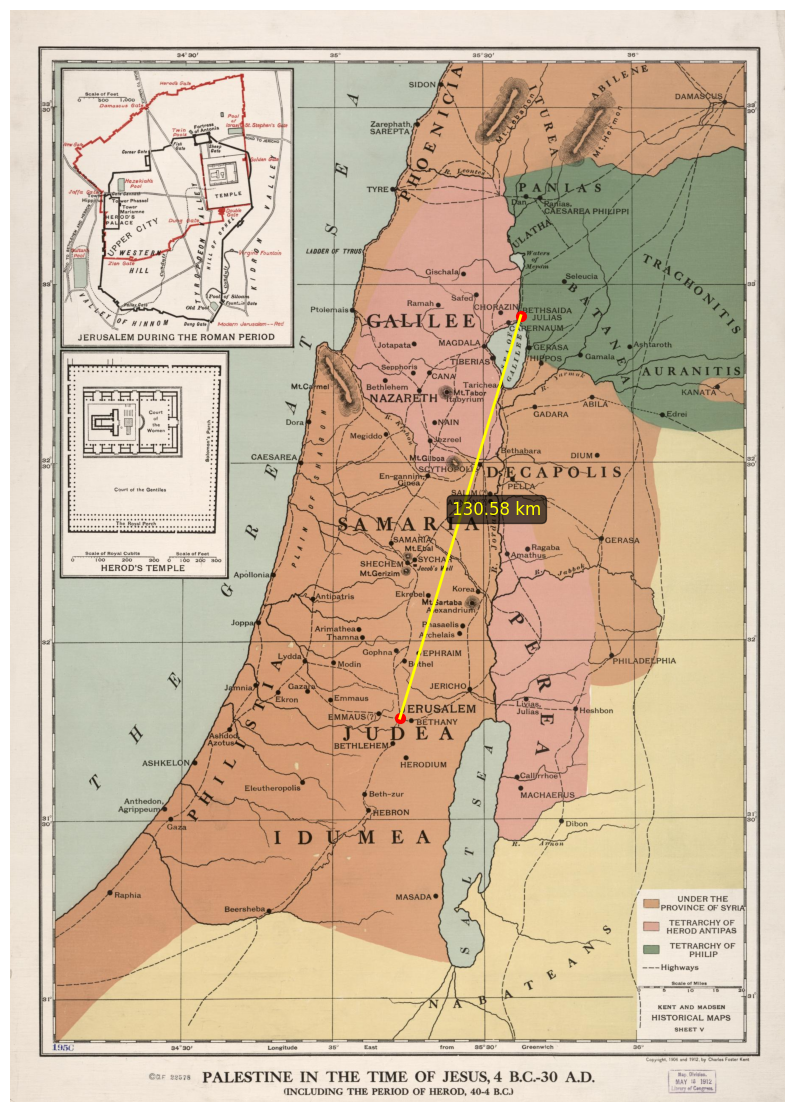

In [39]:
user_pick_and_calculate()